### Visualize CCGP of confidence across Stimulus Onset. 
Done for pairs of features

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_unit

Text(0.5, 1.0, 'Both CCGP of Conf')

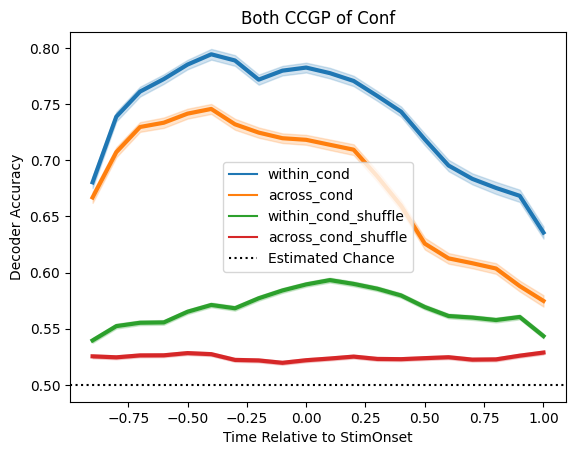

In [2]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"

pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "both"
args.mode = "feat_belief"
args.base_output_path = "/data/patrick_res/ccgp_conf"
args.sig_unit_level = "pref_conf_99th_window_filter_drift"
# args.beh_filters = {"Response": "Correct", "Choice": "Chose"}


res = res = belief_partitions_io.read_ccgp_results(args, pairs, conds=["within_cond", "across_cond"])

fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)
ax.set_title("Both CCGP of Conf")

### by region

Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_within_cond_accs.npy
Warning, shuffle not foun

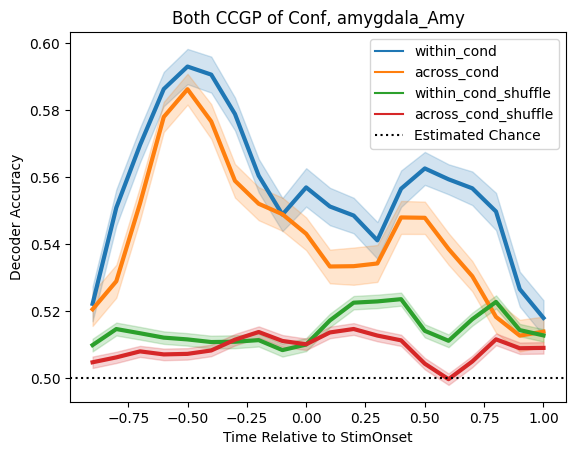

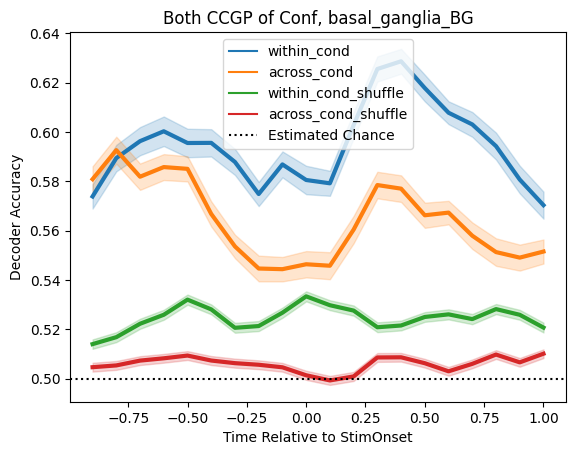

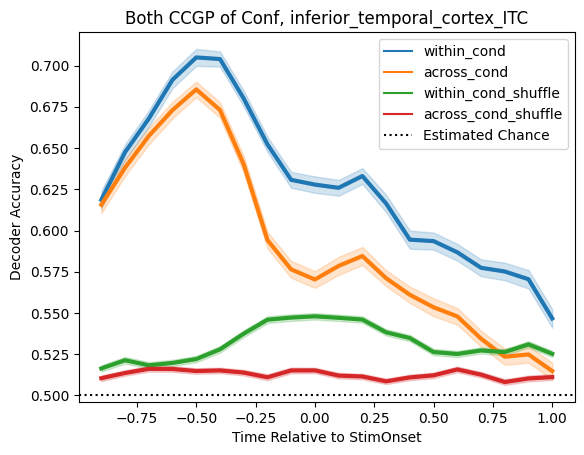

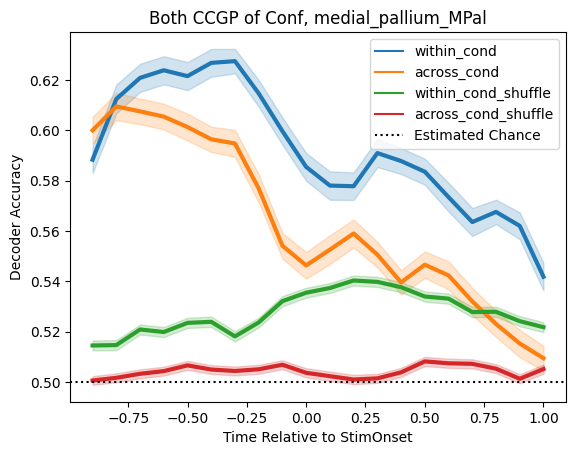

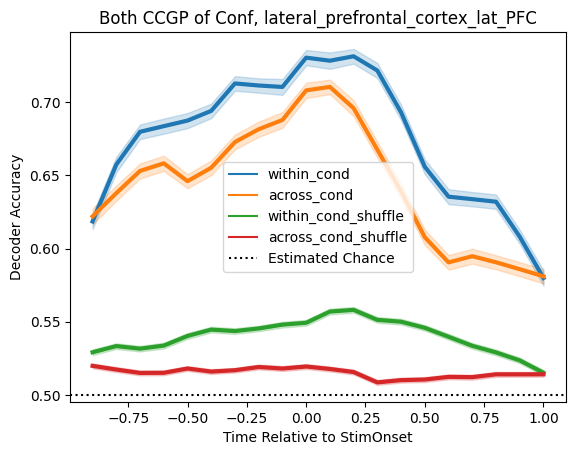

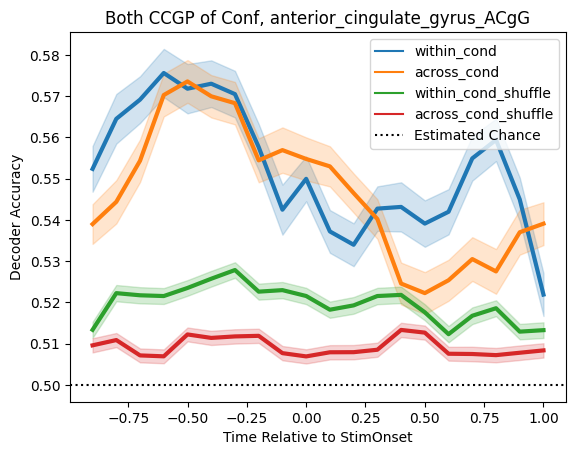

In [3]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)

for region in REGIONS_OF_INTEREST:
    args = argparse.Namespace(
        **BeliefPartitionConfigs()._asdict()
    )
    args.subject = "both"
    args.mode = "feat_belief"
    args.base_output_path = "/data/patrick_res/ccgp_conf"
    args.sig_unit_level = "pref_conf_99th_window_filter_drift"
    args.region_level = "structure_level2_cleaned"
    args.regions = region
    # args.beh_filters = {"Response": "Correct", "Choice": "Chose"}

    res = res = belief_partitions_io.read_ccgp_results(args, pairs, conds=["within_cond", "across_cond"])

    fig, ax = plt.subplots()
    visualization_utils.visualize_ccpg_value(args, res, ax)
    ax.set_title(f"Both CCGP of Conf, {region}")